# Exploratory Data Analysis on Superstore Sales

In [9]:
# import the necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import matplotlib.ticker as ticker


In [10]:
# read dataset
df = pd.read_csv(r'dataset\train.csv')

In [11]:
# first look at dataset
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [12]:
# Describing the data
df.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

### Data cleaning

In [14]:
# Remove unnecessay columns
df.drop(['Row ID'], axis = 1, inplace = True)

In [15]:
# change datatypes
df['Order Date'] = pd.to_datetime(df['Order Date'], format = '%d/%m/%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format = '%d/%m/%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9800 non-null   object        
 1   Order Date     9800 non-null   datetime64[ns]
 2   Ship Date      9800 non-null   datetime64[ns]
 3   Ship Mode      9800 non-null   object        
 4   Customer ID    9800 non-null   object        
 5   Customer Name  9800 non-null   object        
 6   Segment        9800 non-null   object        
 7   Country        9800 non-null   object        
 8   City           9800 non-null   object        
 9   State          9800 non-null   object        
 10  Postal Code    9789 non-null   float64       
 11  Region         9800 non-null   object        
 12  Product ID     9800 non-null   object        
 13  Category       9800 non-null   object        
 14  Sub-Category   9800 non-null   object        
 15  Product Name   9800 n

In [16]:
# sorting data by order date
df.sort_values(by =['Order Date'], inplace = True, ascending = True)

In [17]:
# setting the index to be order data
df.set_index('Order Date', inplace = True)

#### Checking Null data

In [18]:
df.isnull().sum()

Order ID          0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

##### Handle NUll Values
    Instead of droping the obeservations where postal code are null we fill the postal code of the respective city into the postal column 


In [19]:
df[df['Postal Code'].isnull()]

,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
Order Date,,,,,,,,,,,,,,,,
2016-11-07,CA-2016-162887,2016-11-09,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
2016-11-08,CA-2016-117086,2016-11-12,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,FUR-BO-10004834,Furniture,Bookcases,"Riverside Palais Royal Lawyers Bookcase, Royal...",4404.90
2017-01-23,US-2017-165505,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
2017-01-23,US-2017-165505,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
2017-01-23,US-2017-165505,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
2017-04-06,US-2017-150140,2017-04-10,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
2018-01-19,US-2018-127292,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
2018-01-19,US-2018-127292,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04
2018-01-19,US-2018-127292,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28


We can see that the postal code is not mentioned only for Burlington city. So, we need to fill the postal code of that city.

In [20]:
Burlington_postal_code = df[df['City']=='Burlington'][['State','Postal Code','Region']]
Burlington_postal_code

,State,Postal Code,Region
Order Date,,,
2016-11-07,Vermont,NaN,East
2016-11-08,Vermont,NaN,East
2017-01-23,Vermont,NaN,East
2017-01-23,Vermont,NaN,East
2017-01-23,Vermont,NaN,East
2017-04-06,Vermont,NaN,East
2017-11-15,North Carolina,27217.0,South
2018-01-19,Vermont,NaN,East
2018-01-19,Vermont,NaN,East


In [23]:
#### It is clear that we need to fill pincode of East region Burlington City of Vermont state 
#### Accoding to wikipedia the pincode the place is 05401
df['Postal Code'] = df['Postal Code'].fillna(05401.0) # insert 05401.0 instead of 05401 as it of float type
df.isnull().sum()

Order ID         0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

In [25]:
df['Postal Code'].head()

Order Date
2015-01-03    77095.0
2015-01-04    60540.0
2015-01-04    60540.0
2015-01-04    60540.0
2015-01-05    19143.0
Name: Postal Code, dtype: float64

In [26]:
# Change the float data type to string
df['Postal Code'] = df['Postal Code'].astype(int).astype(str) #.astype(int) is used to remove .0 from the end 

In [27]:
df['Postal Code'].head()

Order Date
2015-01-03    77095
2015-01-04    60540
2015-01-04    60540
2015-01-04    60540
2015-01-05    19143
Name: Postal Code, dtype: object

In [106]:
### Lets Find out total unique customer
total_customers = len(pd.unique(df['Customer ID']))
total_sales = df[['Sales']].sum().round(2)
print(total_customers)
print(total_sales)

793
Sales    2261536.78
dtype: float64


In [440]:
# Lets find out with day of week gets higher order

In [441]:
day_df = df.copy()
day_df['Day'] = day_df.index.day_name()
day_count = day_df.groupby('Day').size()
day_count = new_df.reindex(index =['Monday','Tuesday','Wednesday','Thursday','Friday', 'Saturday', 'Sunday'])
day_count

Day
Monday       1593
Tuesday      1889
Wednesday    1229
Thursday      541
Friday       1067
Saturday     1786
Sunday       1695
dtype: int64

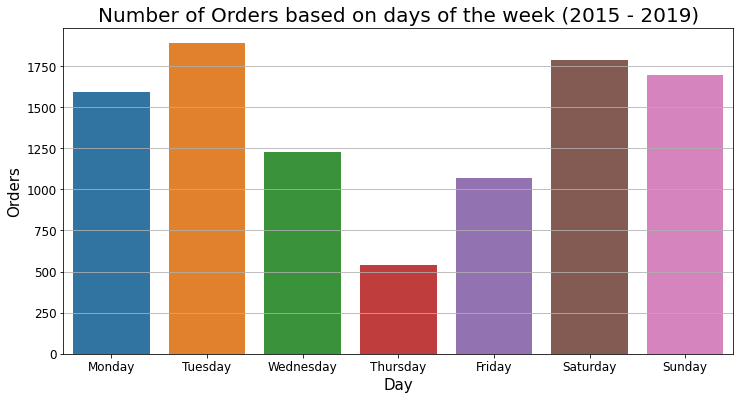

In [442]:
# Visualisation
plt.figure(figsize = (12,6))
plt.title('Number of Orders based on days of the week (2015 - 2019)', fontsize = 20)
sns.barplot(x=day_count.index, y=day_count)
plt.ylabel("Orders", fontsize =15)
plt.xlabel('Day', fontsize =15)
plt.grid(axis = 'y', which= 'major')

#### It is clear with bar graph that on Thursday the sales was lowest and on Tuesday the sales was highest

In [ ]:
### Lets find out who are the most valuable customers

In [30]:
df.columns

Index(['Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name',
       'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region',
       'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales'],
      dtype='object')

In [64]:
top_customers = df.groupby(['Customer ID', 'Customer Name']).sum().sort_values(by='Sale##s', ascending = False).head(20)
top_customers = top_customers[['Sales']].round(2)
top_customers.reset_index(inplace = True)

,Customer ID,Customer Name,Sales
0,SM-20320,Sean Miller,25043.05
1,TC-20980,Tamara Chand,19052.22
2,RB-19360,Raymond Buch,15117.34
3,TA-21385,Tom Ashbrook,14595.62
4,AB-10105,Adrian Barton,14473.57
5,KL-16645,Ken Lonsdale,14175.23
6,SC-20095,Sanjit Chand,14142.33
7,HL-15040,Hunter Lopez,12873.30
8,SE-20110,Sanjit Engle,12209.44
9,CC-12370,Christopher Conant,12129.07


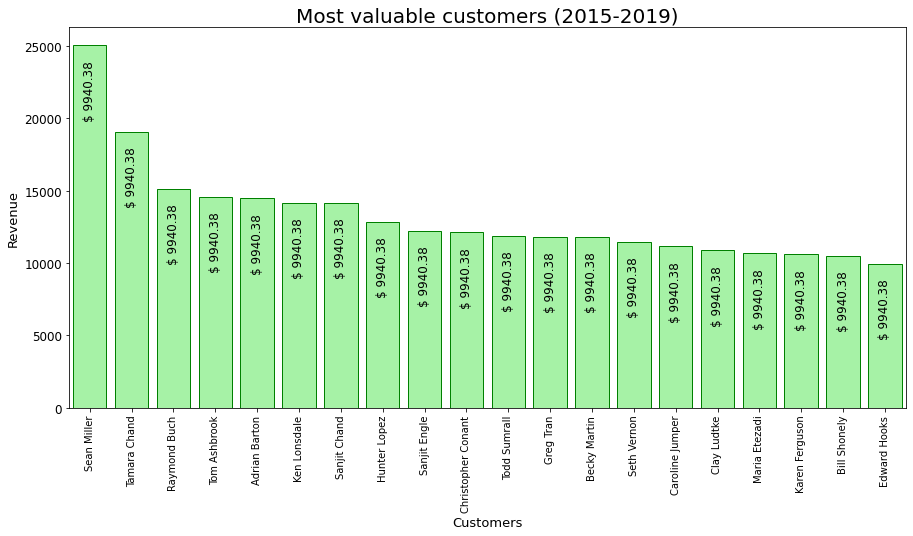

In [120]:
# Visualize the top customers
plt.figure(figsize = (15,7))
plt.title('Most valuable customers (2015-2019)', fontsize = 20)
plt.rcParams['font.size'] = 12
plt.xticks(fontsize = 10,rotation = 90)
sns.barplot(x = top_customers['Customer Name'], y = top_customers['Sales'],color= '#99ff99',edgecolor = 'green', linewidth = 1)
plt.ylabel("Revenue",fontsize= 13)
plt.xlabel('Customers', fontsize= 13)

#To show the exact revenue generated on the figure
for key,value in top_customers["Sales"].items():
    plt.text(key, value-5000, '$ ' + str(v), fontsize=12, rotation = 90, color = 'k', horizontalalignment = 'center');


#### Let's find out which states generated the highest revenue!

In [151]:
# Top 20 states that generate the highest revenue
top_states =  df.groupby(['State']).sum().sort_values(by='Sales', ascending = False).head(20)
top_states = top_states[['Sales']].round(2)
top_states.reset_index(inplace = True)

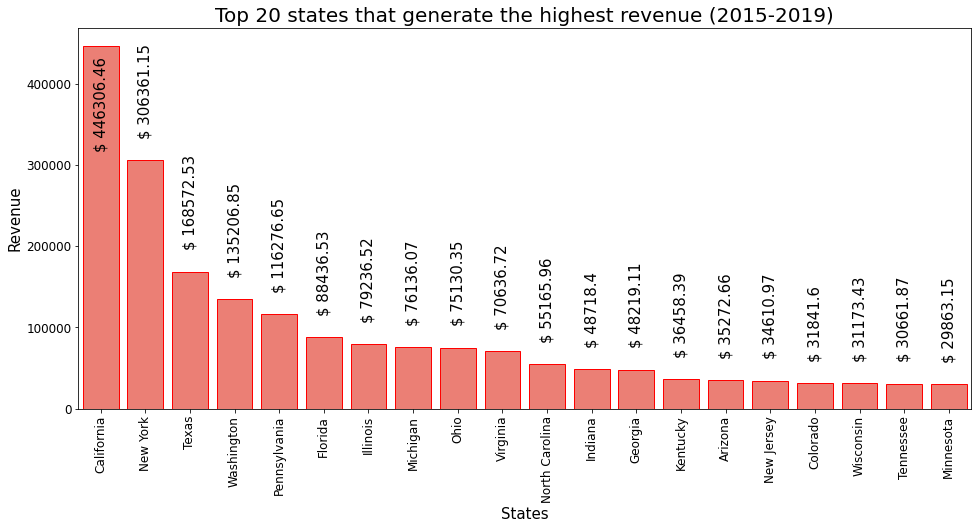

In [198]:
plt.figure(figsize = (16,7))
plt.title("Top 20 states that generate the highest revenue (2015-2019)", fontsize = 20)
plt.xticks(rotation = 90)
sns.barplot(x= top_states['State'], y = top_states['Sales'], color = '#FF6F61', edgecolor ='red', linewidth =1)
plt.xlabel("States", fontsize =15)
plt.ylabel("Revenue", fontsize =15)

for key, value in top_states['Sales'].items():
    if value > 400000:
        plt.text(key, 320000, '$ '+ str(value), fontsize = 15, rotation = 90, horizontalalignment = 'center', color = 'k')
    elif value < 400000:
        plt.text(key,value + 30000, '$ '+ str(value), fontsize = 15, rotation = 90,  horizontalalignment = 'center', color = 'k')
 

#### Let's find out which cities generated highest revenue!

In [189]:
# Here the top 10 cities generated the highest revenue
top_cities = df.groupby(['City']).sum().sort_values(by = 'Sales', ascending = False).head(20)
top_cities['Sales'] = top_cities['Sales'].round(2)
top_cities.reset_index(inplace = True)

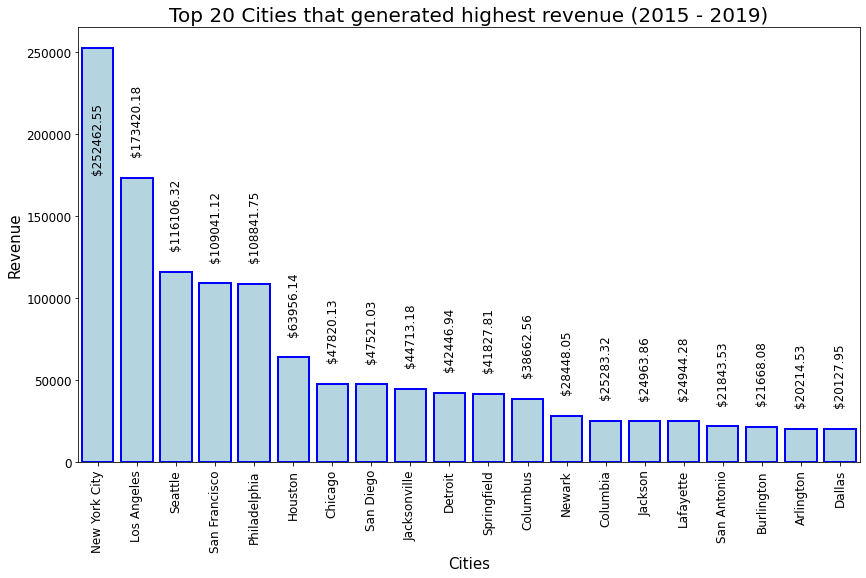

In [200]:
# Visualization
plt.figure(figsize = (14,8))
plt.title("Top 20 Cities that generated highest revenue (2015 - 2019)", fontsize = 20)
plt.xticks(rotation = 90)
sns.barplot(x = top_cities['City'], y=top_cities['Sales'], color = 'lightblue', edgecolor = 'blue', linewidth = 2)
plt.xlabel("Cities", fontsize = 15)
plt.ylabel("Revenue", fontsize = 15)

#To show the exact revenue generated on the figure
for k,v in top_cities["Sales"].items(): 
    if v>250000:
        plt.text(k,v-75000,'$'+ str(v), fontsize=12,rotation=90,color='k', horizontalalignment='center');
    else:
        plt.text(k,v+15000,'$'+ str(v), fontsize=12,rotation=90,color='k', horizontalalignment='center');

#### Let's look at the revenue generated by each category!

In [343]:
top_category = df.groupby(['Category']).sum().sort_values(by=['Sales'], ascending = False)
top_category['Sales'] = top_category['Sales'].round(2)

top_category.reset_index()


,Category,Sales
0,Technology,827455.87
1,Furniture,728658.58
2,Office Supplies,705422.33


In [344]:
top_category = df.groupby(["Category"]).sum().sort_values("Sales", ascending=False)  # Sort the Categories as per the sales
top_category = top_category[["Sales"]] # keep only the sales column in the dataframe
total_revenue_category = top_category["Sales"].sum() # To find the total revenue generated as per category
total_revenue_category = str(int(total_revenue_category)) # Convert the total_revenue_category from float to int and then to string
total_revenue_category = '$' + total_revenue_category # Adding '$' sign before the Value
top_category.reset_index(inplace=True) # Since we have used groupby, we will have to reset the index to add the category into the dataframe

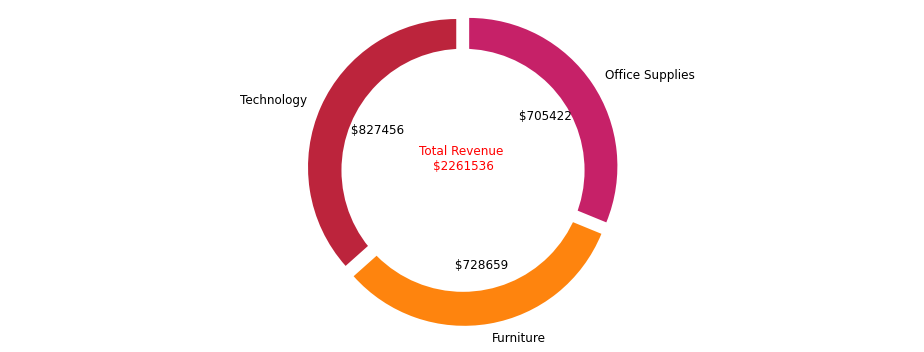

In [346]:
# visualization
plt.rcParams["figure.figsize"] = (13,5)
plt.rcParams['font.size'] = 12.0 
plt.rcParams['font.weight'] = 6 

# we don't want to look at the percentage distribution in the pie chart. Instead, we want to look at the exact revenue generated by the categories.
def autopct_format(values): 
    def my_format(pct): 
        total = sum(values) 
        val = int(round(pct*total/100.0))
        return ' ${v:d}'.format(v=val)
    return my_format
colors = ['#BC243C','#FE840E','#C62168'] # Colors are defined for the pie chart
explode = (0.05,0.05,0.05)
fig1, ax1 = plt.subplots()
ax1.pie(top_category['Sales'], colors = colors, labels=top_category['Category'], autopct= autopct_format(top_category['Sales']), startangle=90,explode=explode)
centre_circle = plt.Circle((0,0),0.82,fc='white') # drawing a circle on the pie chart to make it look better 
fig = plt.gcf()
fig.gca().add_artist(centre_circle) # Add the circle on the pie chart

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal') 
# we can look the total revenue generated by all the categories at the center
label = ax1.annotate('Total Revenue \n'+str(total_revenue_category),color = 'red', xy=(0, 0), fontsize=12, ha="center")
plt.tight_layout()
plt.show()


##### We can see that Category - Technology generated the highest revenue of about 827426!
##### The Total Revenue generated by all the categories - $2261536!

### Which products contributed most to the revenue?

In [347]:
Top_products = df.groupby(["Product Name"]).sum().sort_values("Sales",ascending=False).head(8) # Sort the product names as per the sales
Top_products = Top_products[["Sales"]].round(2) # Round off the Sales Value up to 2 decimal places
Top_products.reset_index(inplace=True) # Since we have used groupby, we will have to reset the index to add the product names into the dataframe
total_revenue_products = Top_products["Sales"].sum() # To find the total revenue generated by all the top products
total_revenue_products = str(int(total_revenue_products)) # Convert the total_revenue_products from float to int and then to string
total_revenue_products = '$' + total_revenue_products # Adding '$' sign before the Value

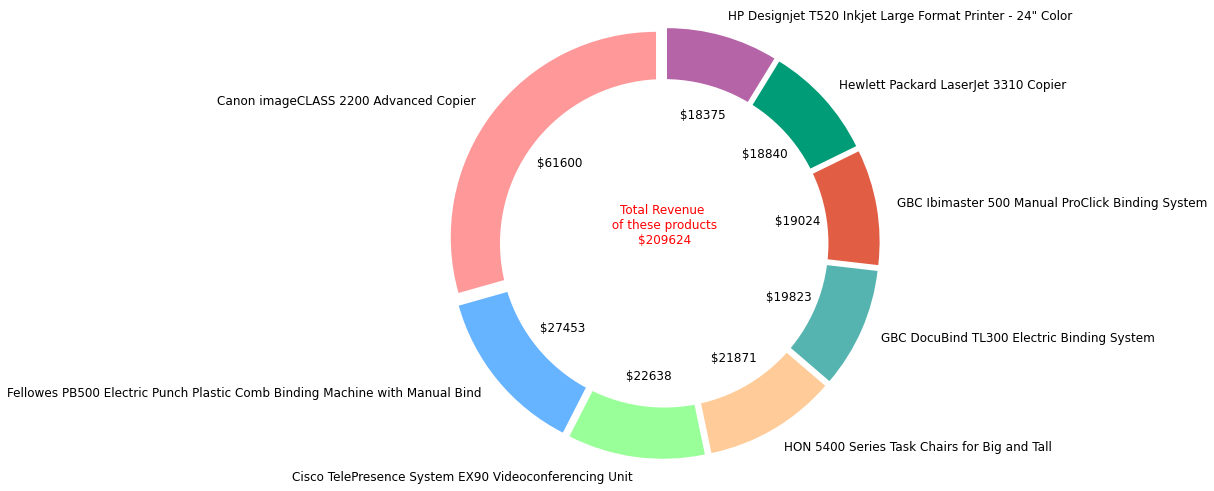

In [348]:
plt.rcParams["figure.figsize"] = (13,7) # width and height of figure is defined in inches
plt.rcParams['font.size'] = 12.0 # Font size is defined for the figure
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#55B4B0','#E15D44','#009B77','#B565A7'] # colors are defined for the pie chart
explode = (0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05)
fig1, ax1 = plt.subplots()
ax1.pie(Top_products['Sales'], colors = colors, labels=Top_products['Product Name'], autopct= autopct_format(Top_products['Sales']), startangle=90,explode=explode)
centre_circle = plt.Circle((0,0),0.80,fc='white') # Draw a circle on the pie chart
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
label = ax1.annotate('Total Revenue \n of these products \n'+str(total_revenue_products),color = 'red', xy=(0, 0), fontsize=12, ha="center")
plt.tight_layout()
plt.show()

#### We can see that Product - Canon imageCLASS 2200 Advanced Copier generated the highest revenue of about $61600!

#### The Total Revenue generated by all these products - $209624!

### Let's look at the revenue generated by each Sub-Category!

In [349]:
# Sort both category and  sub category as per the sales
Top_subcat = df.groupby(['Category','Sub-Category']).sum().sort_values("Sales", ascending=False).head(10)
Top_subcat = Top_subcat[["Sales"]].astype(int) # Cast Sales column to integer data type
Top_subcat = Top_subcat.sort_values("Category") # Sort the values as per Category
Top_subcat.reset_index(inplace=True) # Since we have used groupby, we will have to reset the index to add both columns into data frame
Top_subcat_1 = Top_subcat.groupby(['Category']).sum() # Calculated the total Sales of all the categories
Top_subcat_1.reset_index(inplace=True) # Reset the index

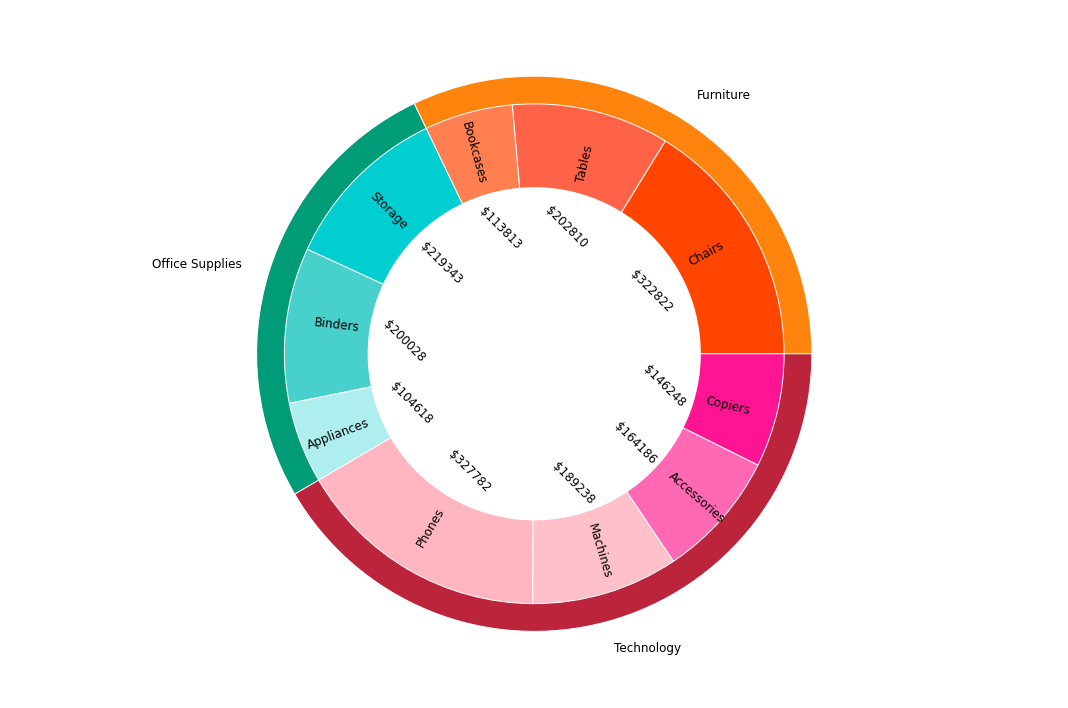

In [350]:
plt.rcParams["figure.figsize"] = (15,10) # width and height of figure is defined in inches
fig, ax = plt.subplots()
ax.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle
width = 0.1
outer_colors = ['#FE840E','#009B77','#BC243C'] # Outer colors of the pie chart
inner_colors = ['Orangered','tomato','coral',"darkturquoise","mediumturquoise","paleturquoise","lightpink","pink","hotpink","deeppink"] # inner colors of the pie chart
pie = ax.pie(Top_subcat_1['Sales'], radius=1, labels=Top_subcat_1['Category'],colors=outer_colors,wedgeprops=dict(edgecolor='w'))
pie2 = ax.pie(Top_subcat['Sales'], radius=1-width, labels=Top_subcat['Sub-Category'],autopct= autopct_format(Top_subcat['Sales']),labeldistance=0.7,colors=inner_colors,wedgeprops=dict(edgecolor='w'), pctdistance=0.53,rotatelabels =True)
# Rotate fractions
# [0] = wedges, [1] = labels, [2] = fractions
fraction_text_list = pie2[2]
for text in fraction_text_list: 
    text.set_rotation(315) # rotate the autopct values
centre_circle = plt.Circle((0,0),0.6,fc='white') # Draw a circle on the pie chart
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

#### We can see that Sub-Category - Phones generated the highest revenue of about $327782!

### Which Segment has the highest sales?

In [353]:
Top_segment = df.groupby(["Segment"]).sum().sort_values("Sales", ascending=False) # Sort the segment as per the sales
Top_segment = Top_segment[["Sales"]] # keep only the sales column in the dataframe
Top_segment.reset_index(inplace=True) # Since we have used groupby, we will have to reset the index to add the segment column into the data frame
total_revenue_segement = Top_segment["Sales"].sum() # To find the total revenue generated as per segment
total_revenue_segement = str(int(total_revenue_segement)) # Convert the total_revenue_segment from float to int and then to string
total_revenue_segement= '$' + total_revenue_segement # Adding '$' sign before the Value

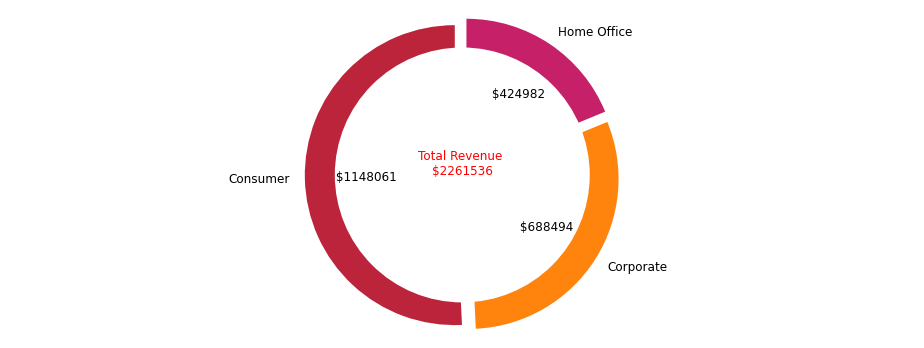

In [354]:
plt.rcParams["figure.figsize"] = (13,5) # width and height of figure is defined in inches
plt.rcParams['font.size'] = 12.0 # Font size is defined
plt.rcParams['font.weight'] = 6 # Font weight is defined
colors = ['#BC243C','#FE840E','#C62168'] # Colors are defined for the pie chart
explode = (0.05,0.05,0.05)
fig1, ax1 = plt.subplots()
ax1.pie(Top_segment['Sales'], colors = colors, labels=Top_segment['Segment'], autopct= autopct_format(Top_segment['Sales']),startangle=90,explode=explode)
centre_circle = plt.Circle((0,0),0.85,fc='white') # Draw a circle on the pie chart
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal') 
label = ax1.annotate('Total Revenue \n'+str(total_revenue_segement),color = 'red', xy=(0, 0), fontsize=12, ha="center")
plt.tight_layout()
plt.show()

#### We can see that Segment - Consumer generated the highest revenue of about $1148061!

#### The Total Revenue generated by all the segments - $209624!

### Which Region has the highest sales?

In [356]:
Top_region = df.groupby(["Region"]).sum().sort_values("Sales", ascending=False) # Sort the Region as per the sales
Top_region = Top_region[["Sales"]].astype(int) # Cast Sales column to integer data type
Top_region.reset_index(inplace=True) # Since we have used groupby, we will have to reset the index to add the Region column into the data frame

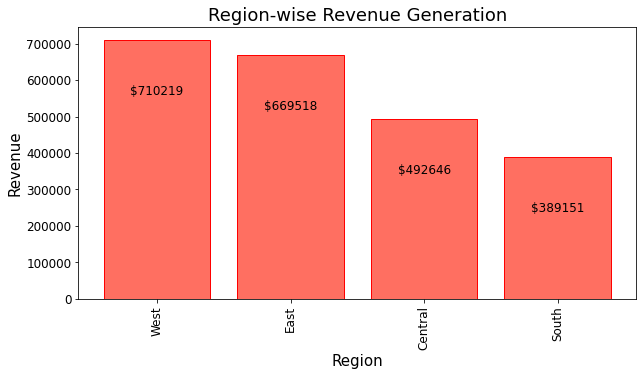

In [357]:
plt.figure(figsize = (10,5)) # width and height of figure is defined in inches
plt.title("Region-wise Revenue Generation", fontsize=18)
plt.bar(Top_region["Region"], Top_region["Sales"],color= '#FF6F61',edgecolor='Red', linewidth = 1)
plt.xlabel("Region",fontsize=15) # x axis shows the Region 
plt.ylabel("Revenue",fontsize=15) # y axis show the Revenue generated
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
for k,v in Top_region["Sales"].items(): #To show the exact revenue generated on the figure
        plt.text(k,v-150000,'$'+ str(v), fontsize=12,color='k', horizontalalignment='center');

### Which shipping mode has the highest sales?

In [359]:
Top_shipping = df.groupby(["Ship Mode"]).sum().sort_values("Sales", ascending=False) # Sort the Shipping modes as per the sales
Top_shipping = Top_shipping[["Sales"]] # keep only the sales column in the dataframe
Top_shipping.reset_index(inplace=True) # Since we have used groupby, we will have to reset the index to add the Ship Mode column into the data frame
total_revenue_ship = Top_segment["Sales"].sum() # To find the total revenue generated as per shipping mode
total_revenue_ship = str(int(total_revenue_ship)) # Convert the total_revenue_ship from float to int and then to string
total_revenue_ship = '$' + total_revenue_ship # Adding '$' sign before the Value

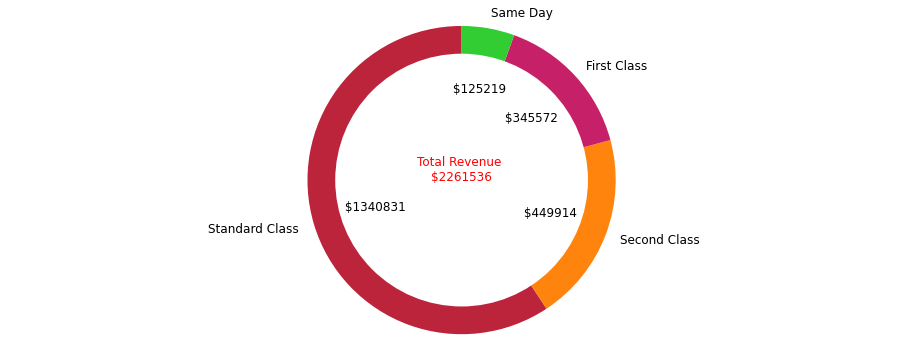

In [360]:
plt.rcParams["figure.figsize"] = (13,5) # width and height of figure is defined in inches
plt.rcParams['font.size'] = 12.0 # Font size is defined
plt.rcParams['font.weight'] = 6 # Font weight is defined
colors = ['#BC243C','#FE840E','#C62168',"limegreen"] # define colors for the pie chart
fig1, ax1 = plt.subplots()
ax1.pie(Top_shipping['Sales'], colors = colors, labels=Top_shipping['Ship Mode'], autopct= autopct_format(Top_shipping['Sales']), startangle=90)
centre_circle = plt.Circle((0,0),0.82,fc='white') # Draw a circle on the pie chart
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal') 
label = ax1.annotate('Total Revenue \n'+str(total_revenue_ship),color = 'red', xy=(0, 0), fontsize=12, ha="center")
plt.tight_layout()
plt.show()

### We can see that Shipping mode - Standard Class generated the highest revenue of about $1340831!

### The Total Revenue generated by all the shipping modes - $2261536!

### Correlation of Features
#### By plotting a correlation matrix, we have a very nice overview of how the features are related to one another. For a Pandas dataframe, we can conveniently use the call .corr which by default provides the Pearson Correlation values of the columns pairwise in that dataframe.

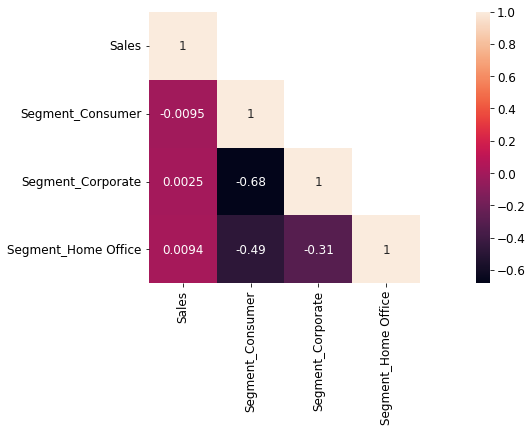

In [362]:
df1 = df[['Segment','Sales']]
df_cat = pd.get_dummies(df1)
cor_mat = df_cat.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)]=False
fig = plt.gcf()
fig.set_size_inches(20,5)
sns.heatmap(data = cor_mat, mask = mask, square = True, annot = True, cbar = True);

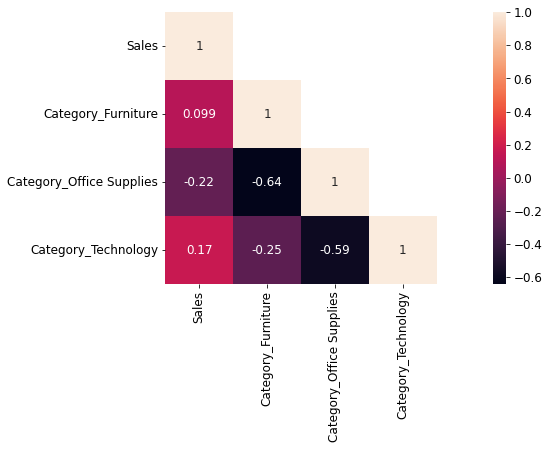

In [363]:
df1 = df[['Category','Sales']]
df_cat = pd.get_dummies(df1)
cor_mat = df_cat.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)]=False
fig = plt.gcf()
fig.set_size_inches(20,5)
sns.heatmap(data = cor_mat, mask = mask, square = True, annot = True, cbar = True);

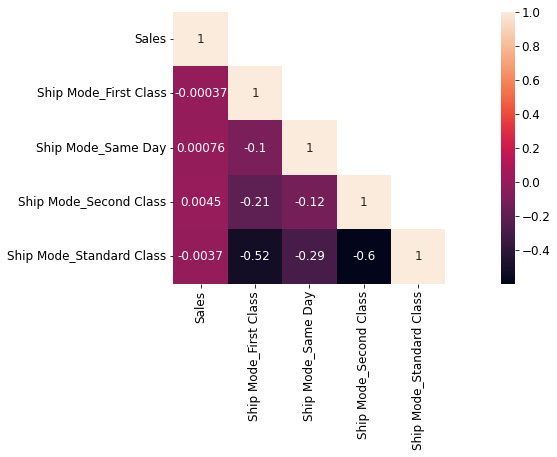

In [364]:
df1 = df[['Ship Mode','Sales']]
df_cat = pd.get_dummies(df1)
cor_mat = df_cat.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)]=False
fig = plt.gcf()
fig.set_size_inches(20,5)
sns.heatmap(data = cor_mat, mask = mask, square = True, annot = True, cbar = True);

### If you like the notebook please upvote it!!